In [1]:
using Revise
using Plots
using ITensors
using QuantumNaturalGradient
using QuantumNaturalfPEPS

[ Info: Precompiling QuantumNaturalfPEPS [8cccb88f-824b-4ada-bd77-4bd123faaa4e]
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



In [2]:
# PEPS(Lx,Ly,phys_dim,bond_dim) generates a PEPS with dimensions Lx * Ly, physical dimension = phys_dim and bond dimension bond_dim
L = 3
hilbert = siteinds("S=1/2", L, L) # Check why it gives errors if used with this
peps = PEPS(Float64, hilbert; bond_dim=1) 

PEPS(L=(3, 3), bond_dim=1, sample_dim=1, contract_dim=3, double_contract_dim=2)

In [3]:
QuantumNaturalfPEPS.update_double_layer_envs!(peps)

2-element Vector{QuantumNaturalfPEPS.Environment}:
 QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=786|"Link,l=9"), (dim=1|id=710|"-1"))
[2] ((dim=1|id=162|"-1"), (dim=1|id=845|"Link,l=12"), (dim=1|id=786|"Link,l=9"))
[3] ((dim=1|id=491|"-1"), (dim=1|id=845|"Link,l=12"))
, 3.243769404316753)
 QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=216|"Link,l=9"), (dim=1|id=837|"-1"))
[2] ((dim=1|id=947|"Link,l=12"), (dim=1|id=216|"Link,l=9"), (dim=1|id=563|"-1"))
[3] ((dim=1|id=947|"Link,l=12"), (dim=1|id=5|"-1"))
, 4.401627961906437)

In [4]:
S, pc, et = QuantumNaturalfPEPS.get_sample(peps)

([1 1 1; 1 0 0; 0 1 1], -2.3540423323489867, QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=777|"Link,l=1"), (dim=1|id=586|"Link,l=7"))
[2] ((dim=1|id=586|"Link,l=7"), (dim=1|id=48|"Link,l=10"), (dim=1|id=66|"Link,l=3"))
[3] ((dim=1|id=48|"Link,l=10"), (dim=1|id=730|"Link,l=5"))
, -0.231164019137011), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=780|"Link,l=7"), (dim=1|id=401|"Link,l=2"))
[2] ((dim=1|id=650|"Link,l=4"), (dim=1|id=881|"Link,l=10"), (dim=1|id=780|"Link,l=7"))
[3] ((dim=1|id=282|"Link,l=6"), (dim=1|id=881|"Link,l=10"))
, -1.6088068091282988)])

In [5]:
QuantumNaturalfPEPS.get_logψ_and_envs(peps, S, et)

(0.49933864974848596 + 3.141592653589793im, QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=777|"Link,l=1"), (dim=1|id=586|"Link,l=7"))
[2] ((dim=1|id=586|"Link,l=7"), (dim=1|id=48|"Link,l=10"), (dim=1|id=66|"Link,l=3"))
[3] ((dim=1|id=48|"Link,l=10"), (dim=1|id=730|"Link,l=5"))
, -0.2311640191370109), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=205|"Link,l=7"), (dim=1|id=401|"Link,l=2"))
[2] ((dim=1|id=650|"Link,l=4"), (dim=1|id=700|"Link,l=10"), (dim=1|id=205|"Link,l=7"))
[3] ((dim=1|id=282|"Link,l=6"), (dim=1|id=700|"Link,l=10"))
, -1.6088068091282985)], QuantumNaturalfPEPS.Environment[QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=401|"Link,l=2"), (dim=1|id=896|"Link,l=9"))
[2] ((dim=1|id=896|"Link,l=9"), (dim=1|id=121|"Link,l=12"), (dim=1|id=650|"Link,l=4"))
[3] ((dim=1|id=121|"Link,l=12"), (dim=1|id=282|"Link,l=6"))
, 2.1081454588767845), QuantumNaturalfPEPS.Environment(MPS
[1] ((dim=1|id=246|"Link,l=9"), (dim=1|id=777|"Link,l=1"))
[2

In [49]:
# Construct a Hamiltonian using OpSum()
# example: Heisenberg

Lx, Ly = size(peps)

ham_heisenberg = OpSum()
for i in 1:Lx-1
    for j in 1:Ly-1
        for t in ["X", "Y", "Z"]
            ham_heisenberg += (-1,t,(i,j),t,(i,j+1)) #structure: (prefactor, operator, position which it acts on, operator, position)
            ham_heisenberg += (-1,t,(i,j),t,(i+1,j))
        end
    end
end

In [6]:
# Construct a Hamiltonian using OpSum()
# easy example: only -Sz so the ground state should have energy -9 

Lx, Ly = size(peps)

ham = OpSum()
for i in 1:Lx
    for j in 1:Ly
        ham += (-1,"Z",(i,j))
    end
end

In [91]:
# this function generates the function needed for the optimization
Oks_and_Eks = generate_Oks_and_Eks(peps, ham) 

(::QuantumNaturalfPEPS.var"#Oks_and_Eks_#40"{TimerOutputs.TimerOutput, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, PEPS, QuantumNaturalGradient.TensorOperatorSum}) (generic function with 1 method)

In [92]:
grad, E_loc, logpsi, S, pc = Oks_and_Eks(flatten(peps), 5)

([-1.0366035097150523 0.0 … 0.0 -0.9117740097138375; -1.036603509715052 0.0 … 1.28301811148503 0.0; … ; -1.036603509715052 0.0 … 0.0 -0.911774009713837; -1.036603509715052 0.0 … 1.2830181114850303 0.0], [1.0, -5.0, 1.0, -1.0, -3.0], ComplexF64[1.321447259531022 + 3.141592653589793im, 2.5740134321730976 + 3.141592653589793im, 1.3609307131808346 + 0.0im, 3.18080388503358 + 0.0im, 2.839225567006808 + 3.141592653589793im], [[0 1 0; 1 1 0; 1 0 1], [0 0 0; 1 1 0; 0 0 0], [1 0 1; 1 1 0; 0 0 1], [0 0 0; 1 1 0; 1 0 1], [0 0 0; 1 1 0; 1 0 0]], [0.9999999999999991, 0.9999999999999991, 1.0, 0.9999999999999991, 0.9999999999999991])

In [94]:
dt = 0.01  # Time step
eigen_cut = 1e-5  # Eigenvalue cutoff for solver
integrator = QuantumNaturalGradient.Euler(lr=dt)  # Define the integrator with learning rate
solver = QuantumNaturalGradient.EigenSolver(eigen_cut, verbose=true)  # Eigenvalue solver with verbosity

θ = flatten(peps)

# Evolve the system
@time loss_value, θ_opt, misc = QuantumNaturalGradient.evolve(Oks_and_Eks, θ; 
                                        integrator, 
                                        verbosity=2, 
                                        solver, 
                                        sample_nr = 9,  # Number of samples 
                                        maxiter = 10,  # Maximum iterations
                                        );

[ Info: EigenSolver: Null space size: 4 - 44.4%  - cn: 1.5342960342794136 - max_val: 24.330334445423084
[ Info: iter 1: EnergySummary(E = -2.78 ± 0.52, var(E) = 2.4 ± 1.6, Nₛ=9), ‖∇f‖ = 2.672776596913183, ‖θ‖ = 5.662710581132659, tdvp_error = -1.1102230246251565e-15
[ Info: EigenSolver: Null space size: 2 - 22.2%  - cn: 1.438097478186851 - max_val: 59.33568220618858
[ Info: iter 2: EnergySummary(E = -0.78 ± 0.97, var(E) = 8.4 ± 2.3, Nₛ=9), ‖∇f‖ = 2.9248736376312174, ‖θ‖ = 5.662773657771029, tdvp_error = 0.0
[ Info: EigenSolver: Null space size: 3 - 33.3%  - cn: 1.5205992763759886 - max_val: 26.43403579951432
[ Info: iter 3: EnergySummary(E = -1.67 ± 0.47, var(E) = 2.0 ± 0.7, Nₛ=9), ‖∇f‖ = 2.3776765012986543, ‖θ‖ = 5.662849193447155, tdvp_error = -1.3322676295501878e-15
[ Info: EigenSolver: Null space size: 5 - 55.6%  - cn: 2.137981253729727 - max_val: 40.88408077325186
[ Info: iter 4: EnergySummary(E = -1.22 ± 0.52, var(E) = 2.4 ± 1.6, Nₛ=9), ‖∇f‖ = 2.5019692761867005, ‖θ‖ = 5.66289910

 ──────────────────────────────────────────────────────────────────────────────
                                      Time                    Allocations      
                             ───────────────────────   ────────────────────────
      Tot / % measured:           27.5s /  78.0%           1.10GiB /  91.5%    

 Section             ncalls     time    %tot     avg     alloc    %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 integrator              10    21.5s  100.0%   2.15s   1.01GiB  100.0%   103MiB
   NaturalGradient       10    20.8s   97.0%   2.08s   0.99GiB   98.8%   102MiB
     solver              10    7.87s   36.7%   787ms    221MiB   21.5%  22.1MiB
     Oks_and_Eks         10    4.03s   18.8%   403ms    502MiB   48.7%  50.2MiB
     copy Oks            10    2.12s    9.9%   212ms   35.4MiB    3.4%  3.54MiB
 ────────────────────────────────────────────────────────────────────────────── 27.556400 seconds (13.30 M allocations:

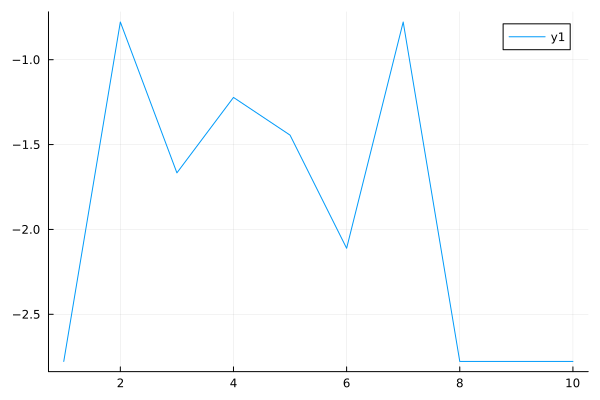

In [95]:
plot(misc["history"][:, 1])